### Project Introduction: Fraudulent Credit Card Transaction Detection

In the modern financial ecosystem, the prevalence of credit card usage has significantly increased, making it a preferred mode of payment for a vast array of transactions. However, this widespread use also attracts fraudulent activities, posing a substantial risk to both consumers and financial institutions. Fraudulent transactions can lead to severe financial losses, erosion of consumer trust, and significant reputational damage for credit card companies. As a result, it is imperative for these companies to effectively identify and mitigate fraudulent transactions in real-time to protect their customers and maintain their operational integrity.

The primary objective of this project is to develop a robust machine learning (ML) model capable of accurately detecting fraudulent credit card transactions. The model will analyze transaction data and differentiate between legitimate and potentially fraudulent activities based on various features. By leveraging advanced ML techniques, the model aims to minimize the occurrence of false positives (legitimate transactions flagged as fraudulent) and false negatives (fraudulent transactions that go undetected), thereby enhancing the security and reliability of credit card services.

**Evaluation Criteria:**  
The performance of the developed model will be evaluated using the Area Under the Receiver Operating Characteristic Curve (ROC AUC). The ROC AUC is a crucial metric in this context as it measures the model's ability to discriminate between fraudulent and non-fraudulent transactions across all possible classification thresholds. A higher ROC AUC value indicates a better-performing model, with a value of 1.0 representing perfect classification and a value of 0.5 indicating no discriminative ability.

---


In [ ]:
# Import packages for data manipulation
import numpy as np
import pandas as pd

# Import packages for data preprocessing
from sklearn.preprocessing import StandardScaler

# Import packages for data visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.tree import plot_tree
from xgboost import plot_importance

# Import packages for statistical modeling
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Import packages for machine learning

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Import packages for model evaluation
from sklearn.metrics import (ConfusionMatrixDisplay, RocCurveDisplay, accuracy_score, classification_report,
                             confusion_matrix, f1_score, mean_absolute_error, mean_squared_error, precision_score,
                             r2_score, recall_score, roc_auc_score, roc_curve)

In [ ]:
df_test0 = pd.read_csv('test.csv')
df_train0 = pd.read_csv('train.csv')

In [ ]:
df_test = df_test0
df_train = df_train0

###Data Exploration (Initial EDA and Data Cleaning)


*   Understanding our variables
*   Cleaning our dataset (missing data, redundant data, outliers)




**Gather basic information about the data**

In [ ]:
#basic information about the data
print(df_test.info())

# Display first few rows of the dataframe
df_test.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69129 entries, 0 to 69128
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  69129 non-null  int64  
 1   Time                69129 non-null  int64  
 2   feat1               69129 non-null  float64
 3   feat2               69129 non-null  float64
 4   feat3               69129 non-null  float64
 5   feat4               69129 non-null  float64
 6   feat5               69129 non-null  float64
 7   feat6               69129 non-null  float64
 8   feat7               69129 non-null  float64
 9   feat8               69129 non-null  float64
 10  feat9               69129 non-null  float64
 11  feat10              69129 non-null  float64
 12  feat11              69129 non-null  float64
 13  feat12              69129 non-null  float64
 14  feat13              69129 non-null  float64
 15  feat14              69129 non-null  float64
 16  feat

,id,Time,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,...,feat20,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,Transaction_Amount
0,150000,73899,-0.681234,-0.371212,0.385966,0.955703,2.064078,0.338827,-0.539452,-0.254046,...,0.183560,-0.253324,0.266668,-0.153829,0.455969,-0.503628,0.257588,-0.456685,-0.298919,30.42
1,150001,73899,-1.098947,-0.959377,0.324934,0.703908,1.090582,-1.595909,0.584548,0.260069,...,0.334764,0.130108,0.676928,-0.161070,-0.638011,-0.273424,0.711132,0.349967,0.141233,23.00
2,150002,73899,0.977029,-0.270984,0.471526,-1.232570,0.957537,-0.636602,-0.953060,-1.491744,...,0.355728,0.517912,1.175087,-0.325895,-0.362636,0.306037,0.004828,0.037389,0.058222,198.00
3,150003,73900,1.176658,-0.225816,-0.246600,0.015513,1.103831,1.229516,-1.527098,-0.459769,...,-0.152613,-0.104600,0.003800,-0.023180,-0.458338,0.481427,-0.381415,0.080165,0.027372,9.99
4,150004,73900,0.804828,-0.272967,0.959910,-1.117567,0.395748,0.589855,1.059880,-1.101203,...,-0.127818,-0.011849,0.078540,-0.241700,0.010130,0.302614,-0.259568,0.023127,0.056957,239.00


In [ ]:
# basic information about the data
print(df_train0.info())

# Display first few rows of the dataframe
df_train0.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  150000 non-null  int64  
 1   Time                150000 non-null  float64
 2   feat1               150000 non-null  float64
 3   feat2               150000 non-null  float64
 4   feat3               150000 non-null  float64
 5   feat4               150000 non-null  float64
 6   feat5               150000 non-null  float64
 7   feat6               150000 non-null  float64
 8   feat7               150000 non-null  float64
 9   feat8               150000 non-null  float64
 10  feat9               150000 non-null  float64
 11  feat10              150000 non-null  float64
 12  feat11              150000 non-null  float64
 13  feat12              150000 non-null  float64
 14  feat13              150000 non-null  float64
 15  feat14              150000 non-nul

,id,Time,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,...,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,Transaction_Amount,IsFraud
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0


In [ ]:
# descriptive statistics about the data
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,150000.0,74999.500000,43301.414527,0.000000,37499.750000,74999.500000,112499.250000,149999.000000
Time,150000.0,49785.422340,18733.655609,0.000000,39411.000000,53785.000000,63833.000000,73899.000000
feat1,150000.0,0.069456,1.346553,-22.173926,-0.844248,0.671327,1.171271,2.390816
feat2,150000.0,-0.003674,1.161502,-44.247914,-0.621724,0.003677,0.753340,16.068473
feat3,150000.0,0.739860,1.012801,-19.088980,0.181373,0.826497,1.360362,6.145578
feat4,150000.0,0.104810,1.230909,-5.069484,-0.738399,0.095342,0.967657,12.547997
feat5,150000.0,-0.254623,1.048268,-21.090735,-0.912254,-0.322525,0.242796,34.581260
feat6,150000.0,0.151934,1.182964,-25.659750,-0.590892,-0.068690,0.492931,15.082516
feat7,150000.0,-0.165443,0.802668,-31.179799,-0.667139,-0.144551,0.334553,23.256066
feat8,150000.0,0.166254,0.691267,-28.903442,-0.078114,0.125052,0.396056,18.270586



*   Data Exploration (Initial EDA and data cleaning)

*   Understanding our variables

*   Clean our dataset (missing data, redundant data,  etc.)


In [ ]:
# Check for missing values
print("numbers of missing values in df_train : ",df_train.isna().sum().sum())
print("numbers of missing values in df_test : ",df_test.isna().sum().sum())

numbers of missing values in df_train :  0
numbers of missing values in df_test :  0


In [ ]:
# Check for duplicates
print("numbers of duplicate in df_train : ",df_train.duplicated().sum())
print("numbers of duplicate in df_test : ",df_test.duplicated().sum())

numbers of duplicate in df_train :  0
numbers of duplicate in df_test :  0


A Heat Map to check the correlations between variables.




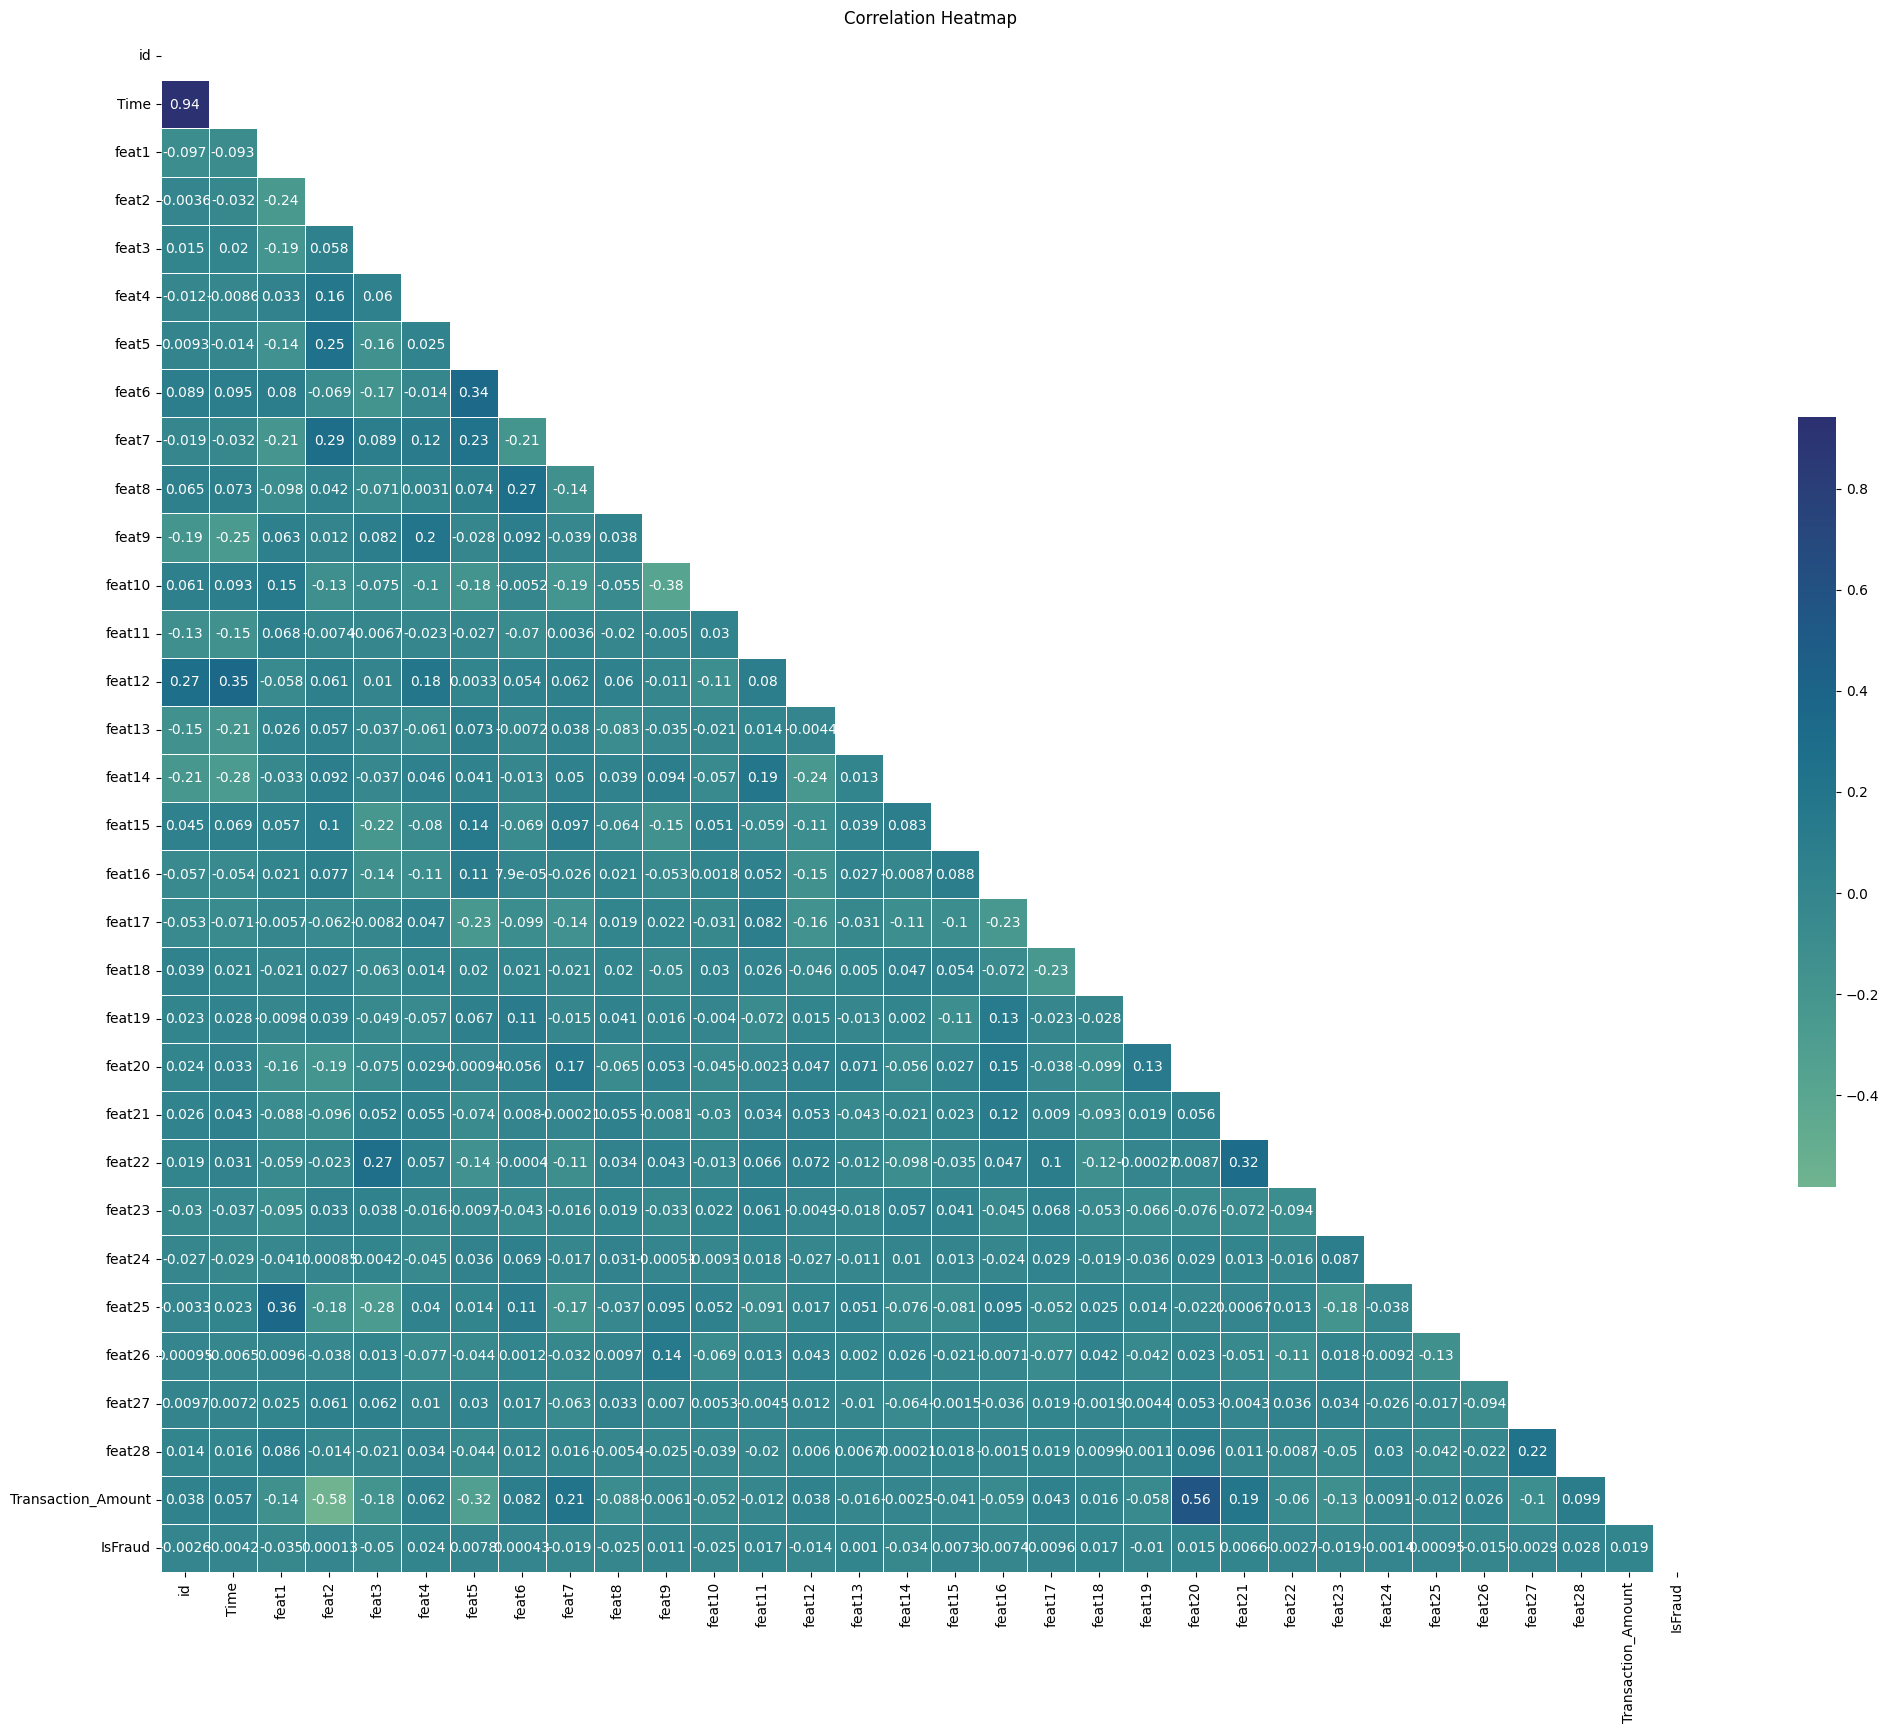

In [ ]:
# Create a figure
plt.figure(figsize=(25, 20))

# Compute the correlation matrix for all the numeric columns in the dataframe
correlation_matrix = df_train.select_dtypes(include=['float64', 'int64']).corr(method='pearson')

# Create a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap with annotations, using the 'crest' colormap
sns.heatmap(correlation_matrix, annot=True, cmap='crest', mask=mask, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap')
# Display the plot
plt.show()

An overview of the distribution of values for each feature within the dataset.

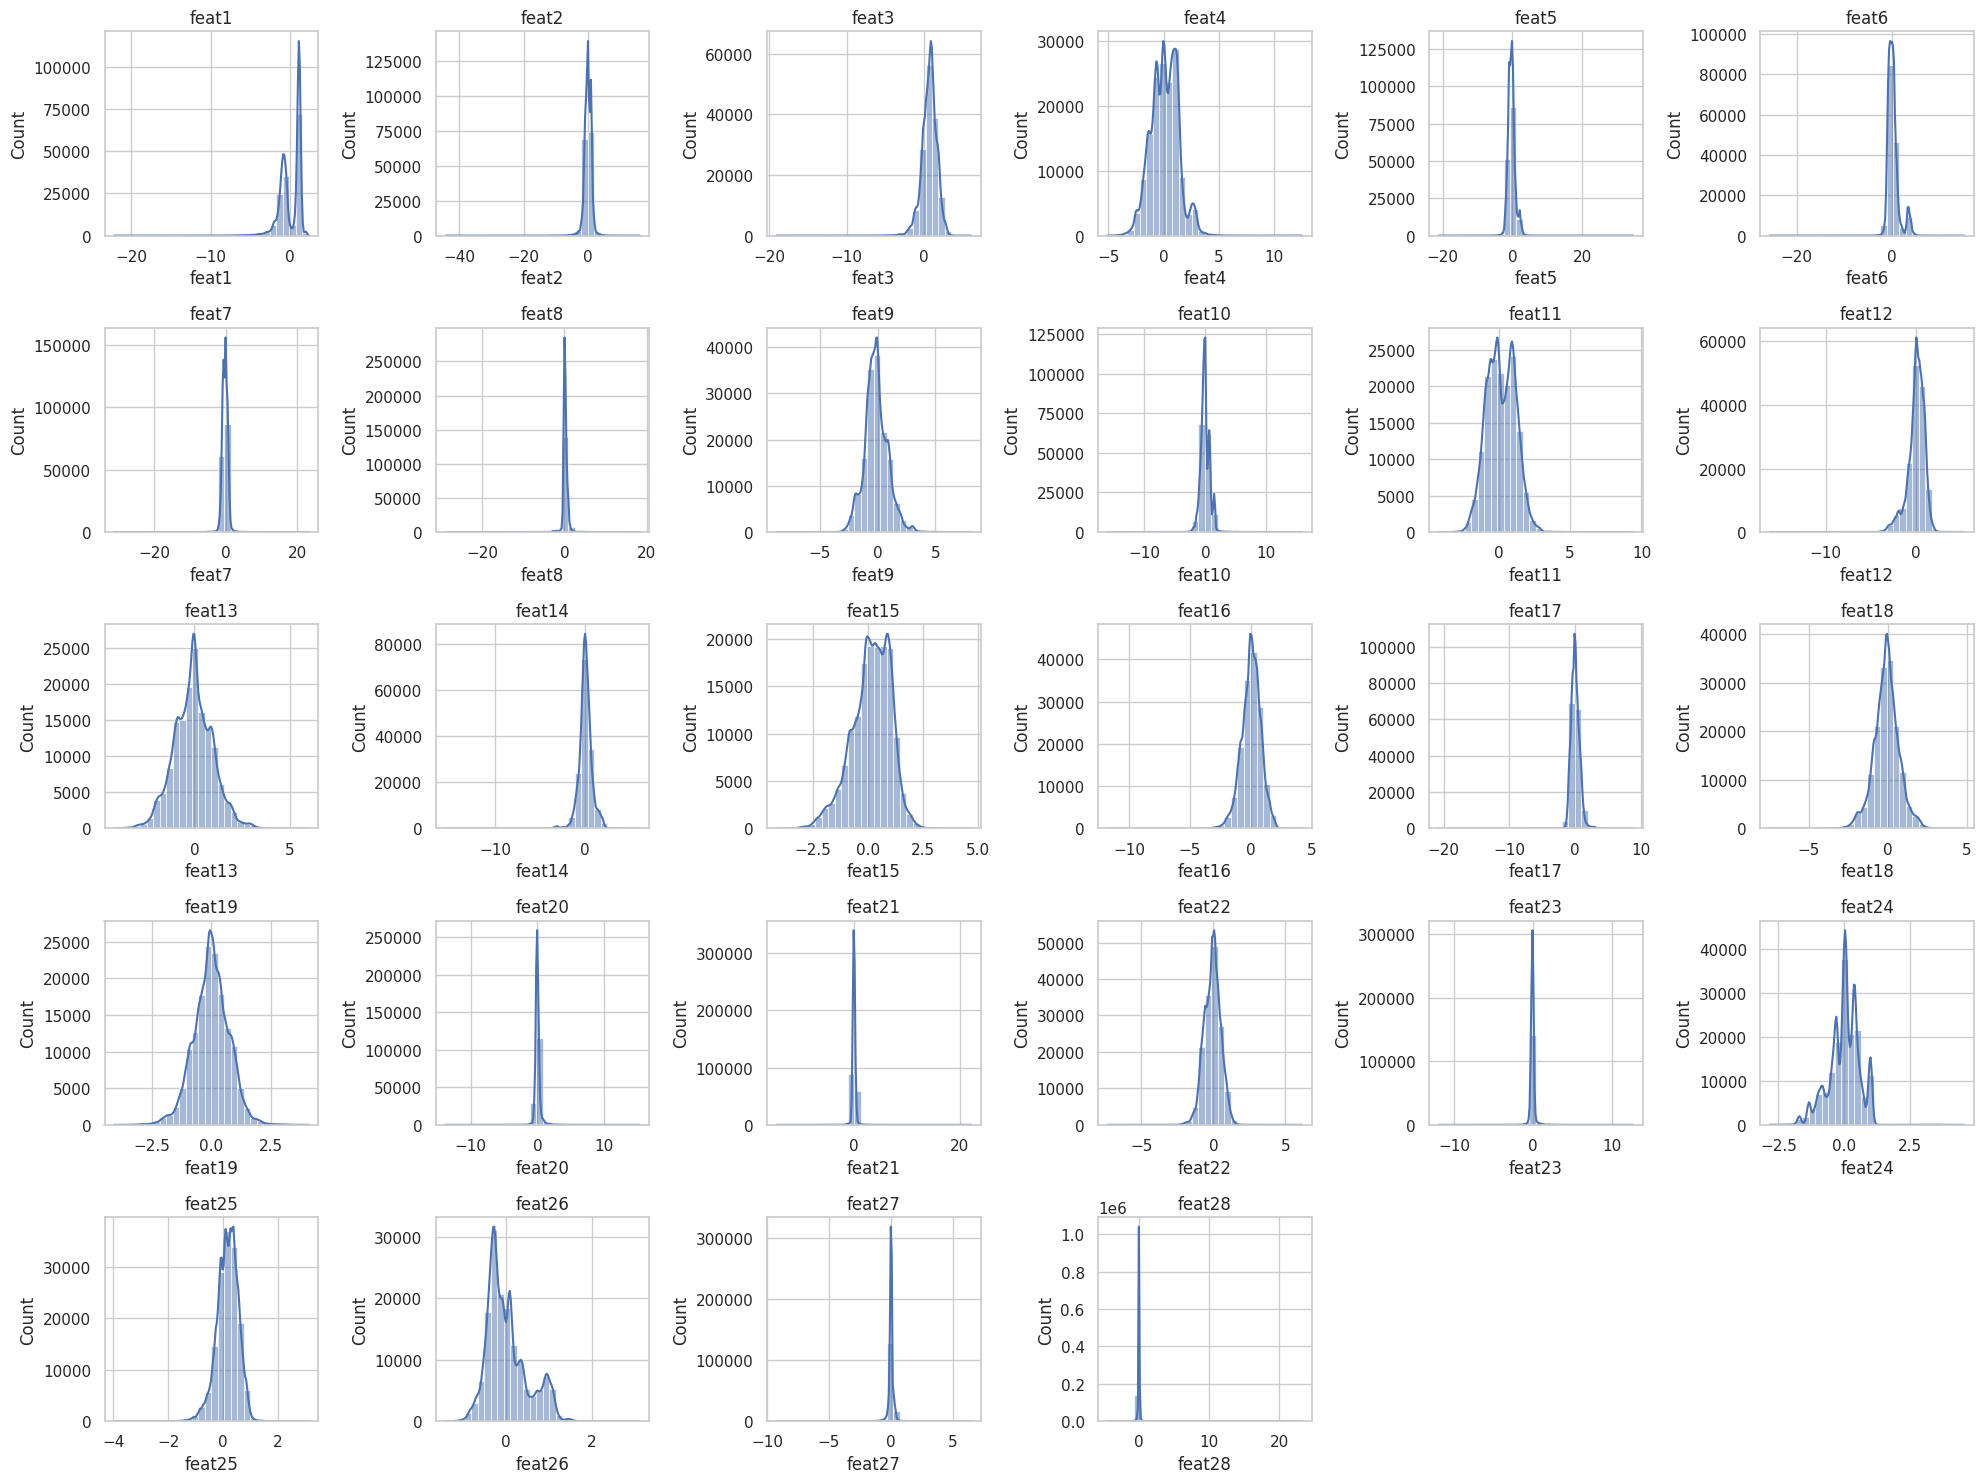

In [ ]:
# Setting the style of seaborn plots to 'whitegrid'
sns.set_theme(style='whitegrid')

# Creating a new figure with specified size
plt.figure(figsize=(20, 15))

# Looping over each column in the DataFrame (excluding 'id', 'Time', and the last two columns)
# is used to show a progress bar
for i, column in enumerate(df_train.columns[2:-2]):
    # Creating a subplot for each column
    plt.subplot(5, 6, i+1)
    # Plotting a histogram for each column
    sns.histplot(df_train[column], kde=True, bins=30)
    # Setting the title of each subplot to the column name
    plt.title(column)

# Adjusting the layout so that there's no overlap between subplots
plt.tight_layout()
# Displaying the figure with all subplots
plt.show()

Each feature predominantly exhibits a Gaussian-like distribution, though with distinct variations in skewness and kurtosis.

A closer examination reveals that certain features are characterized by a bimodal distribution.

In [ ]:
#check the balance of the df
df_train['IsFraud'].value_counts(normalize=True) * 100

,proportion
IsFraud,
0,99.820667
1,0.179333


Given that the dataset is highly imbalanced, as indicated by the distribution of the IsFraud variable (0.998207 for class ‘0’ and 0.001793 for class ‘1’), both classification and anomaly detection could be considered for the credit card fraud detection task.

Anomaly detection algorithms are particularly effective with imbalanced data. They function by learning the “normal” pattern in the data (which in this case would be non-fraudulent transactions) and then flagging any deviation from this pattern as a potential anomaly or fraud.

Note: I will initially apply a classification approach, and subsequently explore anomaly detection methods. This strategy allows for a comprehensive evaluation of different techniques given the nature of the dataset

###Model Building, Results and Evaluation


*   Model preparation

*   Machine learning models
*  Evaluate the model

*   Best Classification model


In [ ]:
# Split into train and test sets
y = df_train["IsFraud"]
X = df_train.drop(columns=['IsFraud','id'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42, stratify=y)

In [ ]:
# Get shape of each training and testing set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112500, 30), (37500, 30), (112500,), (37500,))

###StandardScaler
In machine learning, different features can have different ranges. For example, age might range from 0 to 100, while income might range from 0 to 100,000. This difference in scale can cause issues when training a model, as the feature with the larger scale may dominate the other features.

To prevent this, we use feature scaling, which brings all features to the same scale. The StandardScaler in your code standardizes features by removing the mean (making it 0) and scaling to unit variance (making it 1). This ensures that all features contribute equally to the model, improving its performance.

In [ ]:
# Create the scaler
scaler = StandardScaler()

# Scale the training data
X_train_scale = scaler.fit_transform(X_train)

# Scale the test data
X_test_scale = scaler.transform(X_test)

<ipython-input-23-7234bac676da>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


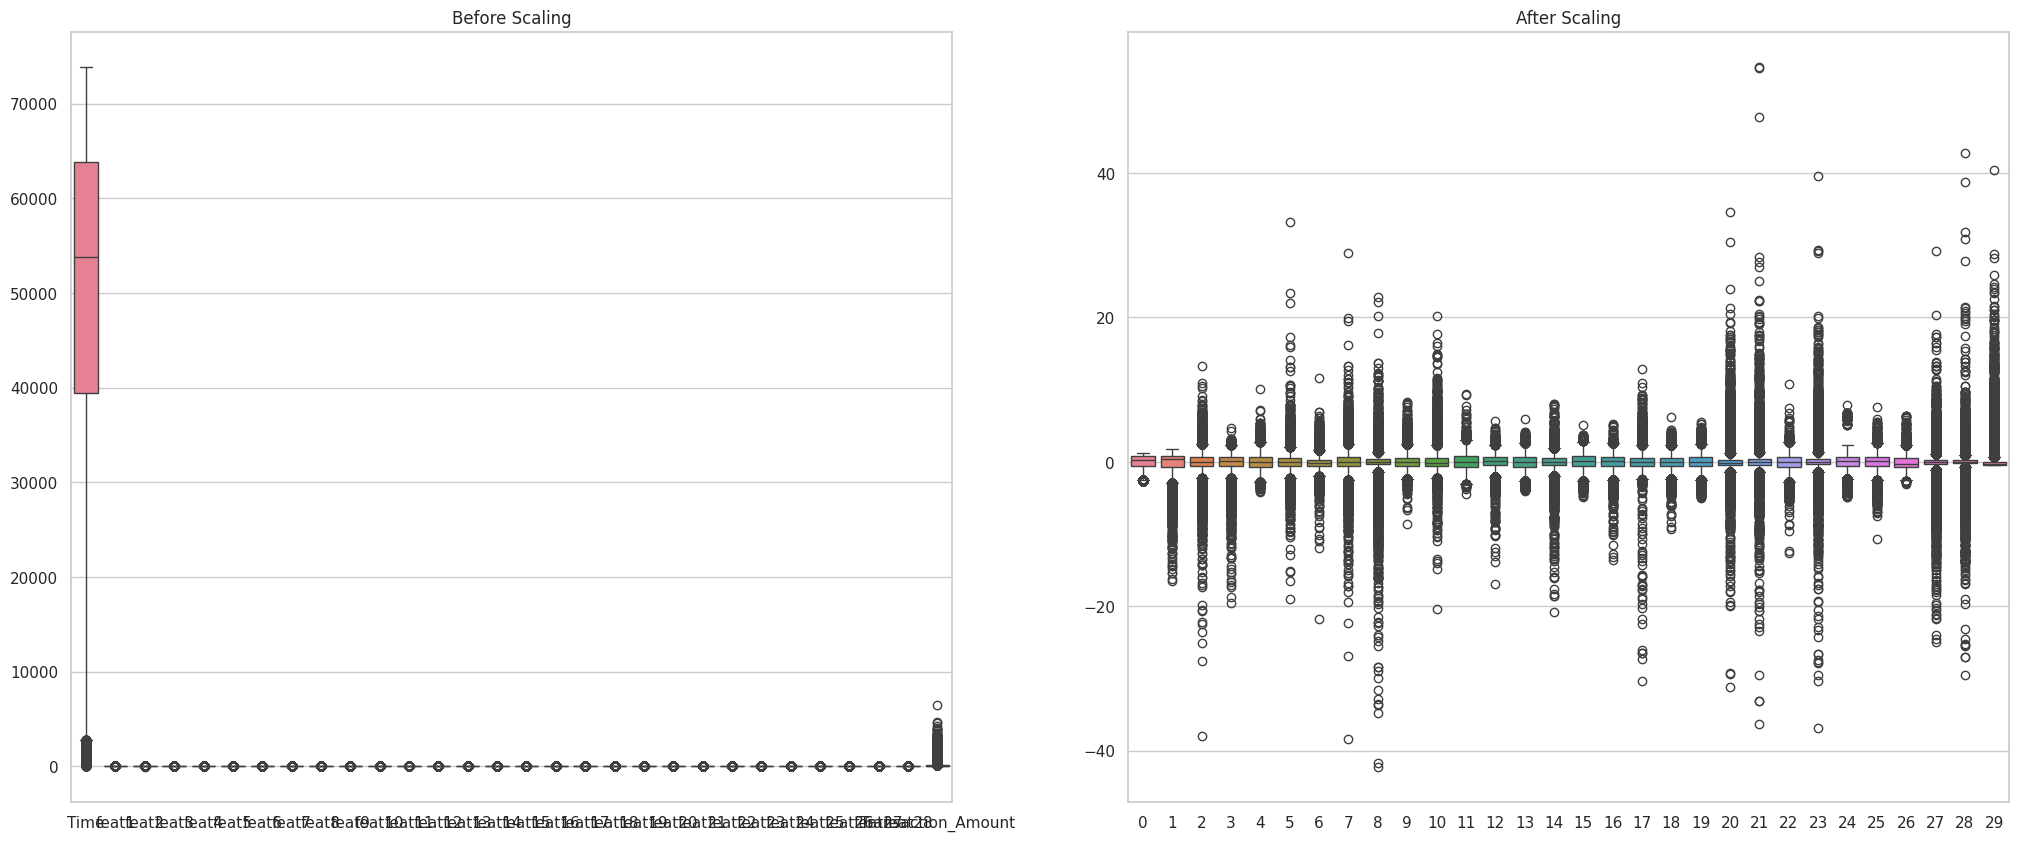

In [ ]:
# Set up the figure size
plt.subplots(figsize=(25, 10))

# Create a boxplot for the training data before scaling
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('Before Scaling')

# Create a boxplot for the training data after scaling
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scale)
plt.title('After Scaling')

# Display the plots
plt.show()

Note: Normally, I would change X_test, X_train to X_test_scale, X_train_scale , but for simplicity, I will leave it as X_test and X_train

In [ ]:
X_train = X_train_scale
X_test = X_test_scale

###Evaluation metrics



*   AUC is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.

*   Precision measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
*  Recall measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
Accuracy measures the proportion of data points that are correctly classified.

*   F1-score is an aggregation of precision and recall.

Note: We will choose the model with the best AUC-ROC scores.

Machine learning models 'First: My Method'
ML models

1.   Logistic Regression
2.   Naive Bayes
3.  Support Vector Machine
4.  K-Nearest Neighbour
5. Quadratic Discriminant Analysis
6. Linear Discriminant Analysis
7. Decision Tree
8. Rand Forest Classifier
9.  Extreme gradient Boosting


### **Logistic Regression**

In [ ]:
# Construct a logistic regression model and fit it to the training set
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [ ]:
# get predictions on the test set
y_pred = log_clf.predict(X_test)

In [ ]:
# Create a dictionary with metric names and corresponding values
lr_dict = {
    'model': ['Logistic Regression'],
    'precision': precision_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    'F1': f1_score(y_test, y_pred),
    'accuracy': accuracy_score(y_test, y_pred),
    'AUC': roc_auc_score(y_test, y_pred)
}

# Convert the dictionary to a Pandas DataFrame
lr_results = pd.DataFrame(lr_dict)

# Print the table
lr_results

,model,precision,recall,F1,accuracy,AUC
0,Logistic Regression,0.333333,0.014925,0.028571,0.998187,0.507436


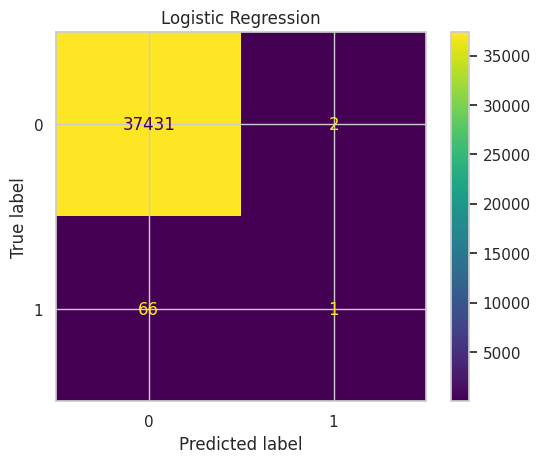

In [ ]:
# Compute values for confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_clf.classes_)
disp.plot(values_format='')
plt.title('Logistic Regression')
plt.show()


**Notes:**
True negatives (The upper-left): The number of instances where the model accurately predicted that a credit card fraud would not occur.

False positives (The upper-right): The number of instances where the model incorrectly predicted a credit card fraud, even though it did not occur.

False negatives (The bottom-left): The number of instances where the model incorrectly predicted that a credit card fraud would not occur, but it did.

True positives (The bottom-right): The number of instances where the model accurately predicted a credit card fraud.

### **Naive Bayes**

In [ ]:
# Instantiate the model
gnb = GaussianNB()

# Fit the model to training data
gnb.fit(X_train, y_train)

# get predictions on the test set
y_pred = gnb.predict(X_test)

In [ ]:
# Create a dictionary with metric names and corresponding values
gnb_dict = {
    'model': ['Gaussian Naive Bayes'],
    'precision': precision_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    'F1': f1_score(y_test, y_pred),
    'accuracy': accuracy_score(y_test, y_pred),
    'AUC': roc_auc_score(y_test, y_pred)
}

# Convert the dictionary to a Pandas DataFrame
gnb_results = pd.DataFrame(gnb_dict)

# Print the table
gnb_results

,model,precision,recall,F1,accuracy,AUC
0,Gaussian Naive Bayes,0.021936,0.432836,0.041757,0.964507,0.699147


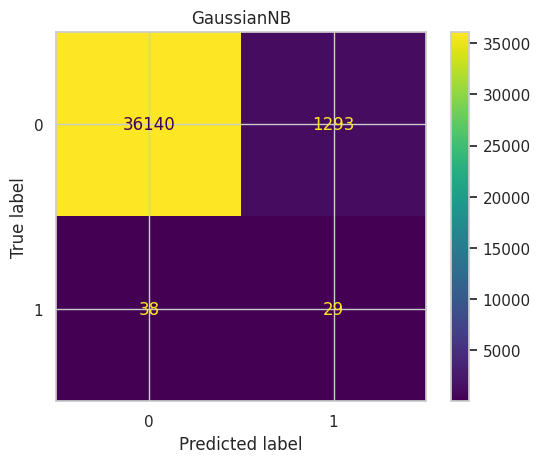

In [ ]:
# Compute values for confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)

# Create display of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot(values_format='')
plt.title('GaussianNB')
plt.show()

### **Support Vector Machine**

In [ ]:
# Instantiate the Support Vector Classifier model
svc = SVC(random_state=42)

# Fit the model to training data
svc.fit(X_train, y_train)

# Get predictions on the test set
y_pred_svc = svc.predict(X_test)

In [ ]:
# Create a dictionary with metric names and corresponding values
svc_dict = {
    'model': ['Support Vector Classifier'],
    'precision': precision_score(y_test, y_pred_svc),
    'recall': recall_score(y_test, y_pred_svc),
    'F1': f1_score(y_test, y_pred_svc),
    'accuracy': accuracy_score(y_test, y_pred_svc),
    'AUC': roc_auc_score(y_test, y_pred_svc)
}

# Convert the dictionary to a Pandas DataFrame
svc_results = pd.DataFrame(svc_dict)

# Print the table
svc_results

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,model,precision,recall,F1,accuracy,AUC
0,Support Vector Classifier,0.0,0.0,0.0,0.998213,0.5


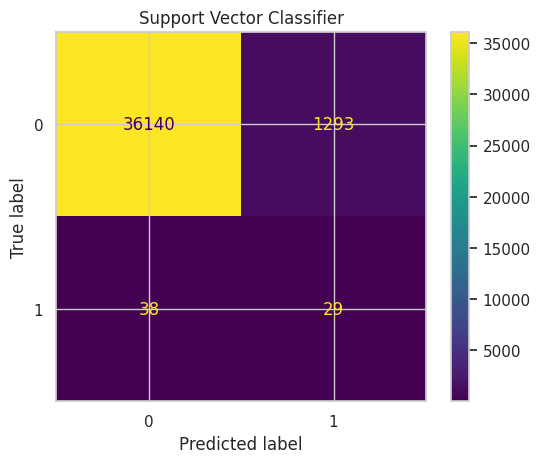

In [ ]:
# Compute values for confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)

# Create display of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot(values_format='')
plt.title('Support Vector Classifier')
plt.show()

### **K-Nearest Neighbors**

In [ ]:
# Instantiate the K-Neighbors Classifier model
knc = KNeighborsClassifier()

In [ ]:
# Fit the model to training data
knc.fit(X_train, y_train)
# Get predictions on the test set
y_pred_knc = knc.predict(X_test)

In [ ]:
# Create a dictionary with metric names and corresponding values
knc_dict = {
    'model': ['K-Neighbors Classifier'],
    'precision': precision_score(y_test, y_pred_knc),
    'recall': recall_score(y_test, y_pred_knc),
    'F1': f1_score(y_test, y_pred_knc),
    'accuracy': accuracy_score(y_test, y_pred_knc),
    'AUC': roc_auc_score(y_test, y_pred_knc)
}

# Convert the dictionary to a Pandas DataFrame
knc_results = pd.DataFrame(knc_dict)

# Print the table
knc_results

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,model,precision,recall,F1,accuracy,AUC
0,K-Neighbors Classifier,0.0,0.0,0.0,0.998213,0.5


**Tuning & Cross-Validation K-Neighbors Classifier**

The model can be particularly susceptible to overfitting. Combining hyperparameter tuning and grid search can help ensure this doesn’t happen

Utilize cross-validated hyperparameter tuning to identify the optimal parameters for the model

In [ ]:
# Assign a dictionary of hyperparameters to search over
cv_params = {'n_neighbors': [29],
             'weights': ['distance']}

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
knc_cv = GridSearchCV(knc, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
%%time
knc_cv.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defin

CPU times: user 2min 23s, sys: 62.8 ms, total: 2min 23s
Wall time: 2min 23s


GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [29], 'weights': ['distance']},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [ ]:
# Check best params
knc_cv.best_params_

{'n_neighbors': 29, 'weights': 'distance'}

In [ ]:
# Check best ROC score on CV
knc_cv.best_score_

0.5744974714018259

**Extract all the validation scores from the grid search.**

In [ ]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc

    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                        })

    return table

In [ ]:
# Get all CV scores
knc_cv_results = make_results('K-Neighbors Classifier cv', knc_cv, 'auc')
knc_cv_results

,model,precision,recall,F1,accuracy,AUC
0,K-Neighbors Classifier cv,0.0,0.0,0.0,0.998204,0.574497


In [ ]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })

    return table

In [ ]:
# Get predictions on test data
knc_cv_scores = get_scores('K-Neighbors Classifier Test', knc_cv, X_test, y_test)
knc_cv_scores

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,model,precision,recall,F1,accuracy,AUC
0,K-Neighbors Classifier Test,0.0,0.0,0.0,0.998213,0.5


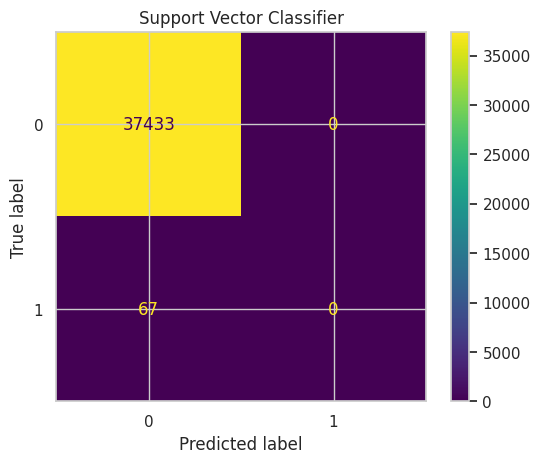

In [ ]:
# confusion matrix
preds = knc_cv.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=knc_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knc_cv.classes_)
disp.plot(values_format='')
plt.title('Support Vector Classifier')
plt.show()

In [ ]:
# Instantiate the Quadratic Discriminant Analysis model
qda = QuadraticDiscriminantAnalysis()

In [ ]:
# Fit the model to training data
qda.fit(X_train, y_train)
# Get predictions on the test set
y_pred_qda = qda.predict(X_test)

In [ ]:
# Create a dictionary with metric names and corresponding values
qda_dict = {
    'model': ['Quadratic Discriminant Analysis'],
    'precision': precision_score(y_test, y_pred_qda),
    'recall': recall_score(y_test, y_pred_qda),
    'F1': f1_score(y_test, y_pred_qda),
    'accuracy': accuracy_score(y_test, y_pred_qda),
    'AUC': roc_auc_score(y_test, y_pred_qda)
}

# Convert the dictionary to a Pandas DataFrame
qda_results = pd.DataFrame(qda_dict)

# Print the table
qda_results

,model,precision,recall,F1,accuracy,AUC
0,Quadratic Discriminant Analysis,0.022189,0.447761,0.042283,0.96376,0.706222


In [ ]:
# Assign a dictionary of hyperparameters to search over
cv_params = {'reg_param': [0.2]}

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy','precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
qda_cv = GridSearchCV(qda, cv_params, scoring=scoring, cv=4, refit='roc_auc')


In [ ]:
%%time
qda_cv.fit(X_train, y_train)

CPU times: user 2.12 s, sys: 814 ms, total: 2.94 s
Wall time: 1.58 s


GridSearchCV(cv=4, estimator=QuadraticDiscriminantAnalysis(),
             param_grid={'reg_param': [0.2]}, refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [ ]:
# Check best params
qda_cv.best_params_

{'reg_param': 0.2}

In [ ]:
# Check best ROC score on CV
qda_cv.best_score_

0.7699744341741275

In [ ]:
# Get all CV scores
qda_cv_results = make_results('Quadratic Discriminant Analysis cv', qda_cv, 'auc')
qda_cv_results

,model,precision,recall,F1,accuracy,AUC
0,Quadratic Discriminant Analysis cv,0.018233,0.346863,0.034639,0.964933,0.769974


In [ ]:
# Get predictions on test data
qda_cv_scores = get_scores('Quadratic Discriminant Analysis Test', qda_cv, X_test, y_test)
qda_cv_scores

,model,precision,recall,F1,accuracy,AUC
0,Quadratic Discriminant Analysis Test,0.022371,0.447761,0.042614,0.964053,0.706369


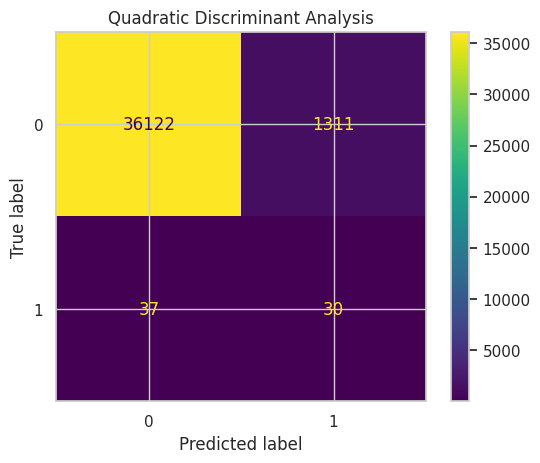

In [ ]:
# confusion matrix
preds = qda_cv.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=qda_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=qda_cv.classes_)
disp.plot(values_format='')
plt.title('Quadratic Discriminant Analysis')
plt.show()

In [ ]:
# Instantiate the Linear Discriminant Analysis model
lda = LinearDiscriminantAnalysis()

In [ ]:
# Fit the model to training data
lda.fit(X_train, y_train)
# Get predictions on the test set
y_pred_lda = lda.predict(X_test)

In [ ]:
# Create a dictionary with metric names and corresponding values
lda_dict = {
    'model': ['Linear Discriminant Analysis'],
    'precision': precision_score(y_test, y_pred_lda),
    'recall': recall_score(y_test, y_pred_lda),
    'F1': f1_score(y_test, y_pred_lda),
    'accuracy': accuracy_score(y_test, y_pred_lda),
    'AUC': roc_auc_score(y_test, y_pred_lda)
}

# Convert the dictionary to a Pandas DataFrame
lda_results = pd.DataFrame(lda_dict)

# Print the table
lda_results

,model,precision,recall,F1,accuracy,AUC
0,Linear Discriminant Analysis,0.047847,0.149254,0.072464,0.993173,0.571969


In [ ]:
# Assign a dictionary of hyperparameters to search over
cv_params = {'solver': ['svd']}

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy','precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
lda_cv = GridSearchCV(lda, cv_params, scoring=scoring, cv=4, refit='roc_auc')


In [ ]:
%%time
lda_cv.fit(X_train, y_train)

CPU times: user 3.61 s, sys: 376 ms, total: 3.98 s
Wall time: 3.52 s


GridSearchCV(cv=4, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd']}, refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [ ]:
# Check best params
lda_cv.best_params_

{'solver': 'svd'}

In [ ]:
# Check best ROC score on CV
lda_cv.best_score_

0.7516052265923396

In [ ]:
# Get all CV scores
lda_cv_results = make_results('Linear Discriminant Analysis cv', lda_cv, 'auc')
lda_cv_results

,model,precision,recall,F1,accuracy,AUC
0,Linear Discriminant Analysis cv,0.060515,0.183235,0.089345,0.993227,0.751605


In [ ]:
# Get predictions on test data
lda_cv_scores = get_scores('Linear Discriminant Analysis Test', lda_cv, X_test, y_test)
lda_cv_scores

,model,precision,recall,F1,accuracy,AUC
0,Linear Discriminant Analysis Test,0.047847,0.149254,0.072464,0.993173,0.571969


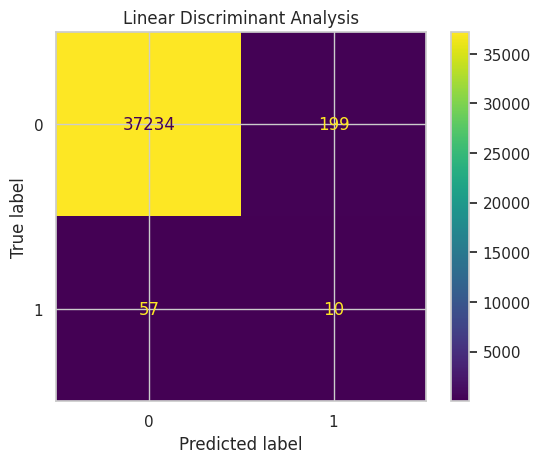

In [ ]:
# confusion matrix
preds = lda_cv.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=lda_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lda_cv.classes_)
disp.plot(values_format='')
plt.title('Linear Discriminant Analysis')
plt.show()

In [ ]:
# Instantiate the model
decision_tree = DecisionTreeClassifier(random_state=42)

In [ ]:
# Fit the model to training data
decision_tree.fit(X_train, y_train)
# Make predictions on test data
dt_pred = decision_tree.predict(X_test)

In [ ]:
# Create a dictionary with metric names and corresponding values
dt_dict = {
    'model': ['Decision Tree'],
    'precision': precision_score(y_test, dt_pred),
    'recall': recall_score(y_test, dt_pred),
    'F1': f1_score(y_test, dt_pred),
    'accuracy': accuracy_score(y_test, dt_pred),
    'AUC': roc_auc_score(y_test, dt_pred)
}

# Convert the dictionary to a Pandas DataFrame
dt_pred_results = pd.DataFrame(dt_dict)

# Print the table
dt_pred_results

,model,precision,recall,F1,accuracy,AUC
0,Decision Tree,0.012048,0.014925,0.013333,0.996053,0.506367


In [ ]:
# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[10],
             'min_samples_leaf': [4],
             'min_samples_split': [10]
             }

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy','precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
tree = GridSearchCV(decision_tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
%%time
tree.fit(X_train, y_train)

CPU times: user 35.3 s, sys: 23.6 ms, total: 35.4 s
Wall time: 35.6 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [10], 'min_samples_leaf': [4],
                         'min_samples_split': [10]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [ ]:
# Check best params
tree.best_params_

{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}

In [ ]:
# Check best ROC score on CV
tree.best_score_

0.5922010375375746

In [ ]:
# Get all CV scores
tree_cv_results = make_results('Decision Tree cv', tree, 'auc')
tree_cv_results

,model,precision,recall,F1,accuracy,AUC
0,Decision Tree cv,0.119949,0.019706,0.03366,0.997973,0.592201


In [ ]:
# Get predictions on test data
tree_test_scores = get_scores('Decision Tree Test', tree, X_test, y_test)
tree_test_scores

,model,precision,recall,F1,accuracy,AUC
0,Decision Tree Test,0.0625,0.014925,0.024096,0.99784,0.507262


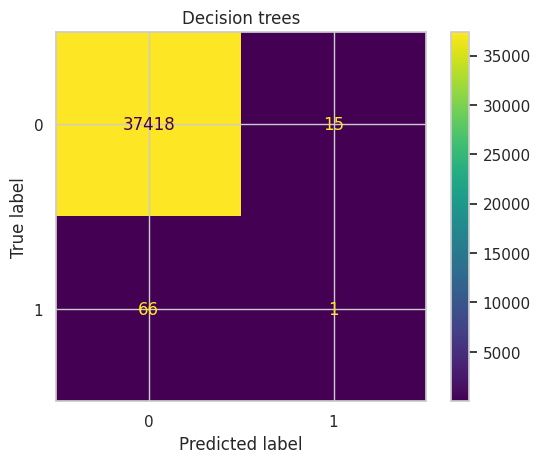

In [ ]:
# confusion matrix
preds = tree.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=tree.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree.classes_)
disp.plot(values_format='')
plt.title('Decision trees')
plt.show()

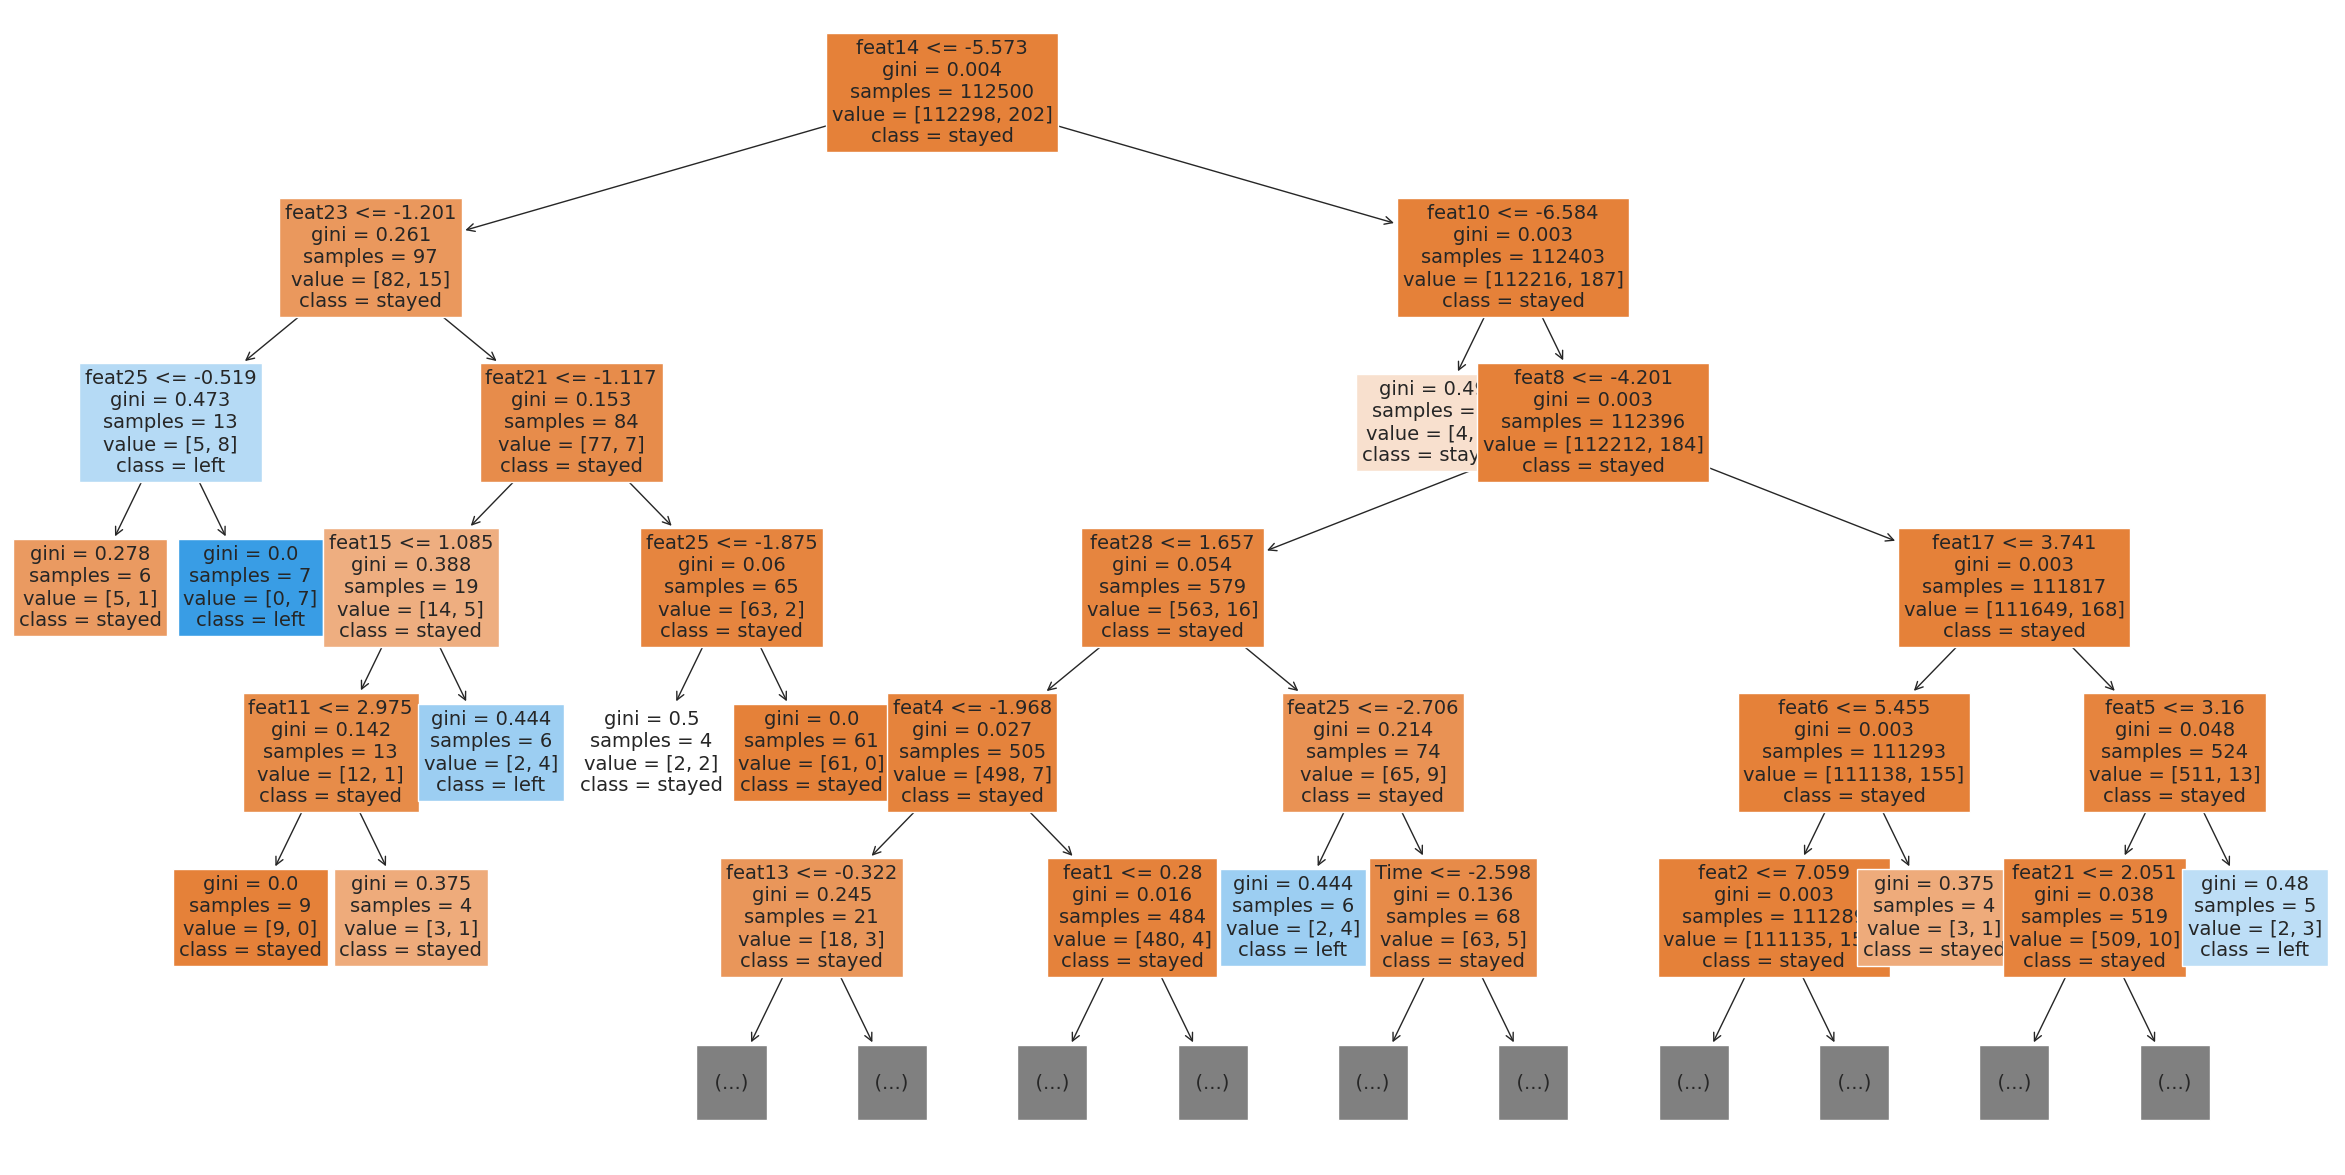

In [ ]:
# Plot the tree
plt.figure(figsize=(30,15))
plot_tree(tree.best_estimator_,
          max_depth=5, fontsize=14, feature_names=X.columns,
          class_names={ 1:'left',0: 'stayed'}, filled=True);
plt.show()

In [ ]:
# Create a Random Forest Classifier with a specified random state
rf = RandomForestClassifier(random_state=42)

# Define a dictionary of hyperparameters to search over using GridSearchCV
cv_params = {'max_depth': [8],
             'min_samples_leaf': [10],
             'n_estimators': [10],
             }

# Define a set of scoring metrics to capture during cross-validation
scoring = ['accuracy','precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearchCV with the Random Forest Classifier, hyperparameters, scor ing, and cross-validation setup
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
%%time
rf_cv.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defin

CPU times: user 34.5 s, sys: 29.8 ms, total: 34.6 s
Wall time: 34.8 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [8], 'min_samples_leaf': [10],
                         'n_estimators': [10]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [ ]:
# Check best params
rf_cv.best_params_

{'max_depth': 8, 'min_samples_leaf': 10, 'n_estimators': 10}

In [ ]:
# Check best ROC score on CV
rf_cv.best_score_

0.7258781439881874

In [ ]:
# Get all CV scores
rf_cv_results = make_results('Random Forest cv', rf_cv, 'auc')
rf_cv_results

,model,precision,recall,F1,accuracy,AUC
0,Random Forest cv,0.0,0.0,0.0,0.998204,0.725878


In [ ]:
# Get predictions on test data
rf_test_scores = get_scores('Random Forest Test', rf_cv, X_test, y_test)
rf_test_scores

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,model,precision,recall,F1,accuracy,AUC
0,Random Forest Test,0.0,0.0,0.0,0.998213,0.5


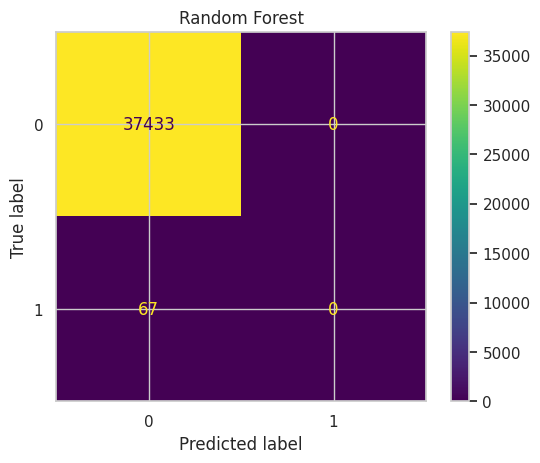

In [ ]:
# confusion matrix
preds = rf_cv.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_cv.classes_)
disp.plot(values_format='')
plt.title('Random Forest')
plt.show()

In [ ]:
# Instantiate the model
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# Assign a dictionary of hyperparameters to search over
cv_params = {'learning_rate': [0.026],
            'max_depth': [4],
            'min_child_weight': [2],
            'n_estimators': [322],
            'subsample': [0.50],
            'colsample_bytree': [0.95],
            'gamma': [0.15]
            }

#Assign a dictionary of scoring metrics to capture
scoring = ['accuracy','precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
%%time
xgb_cv.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CPU times: user 43 s, sys: 147 ms, total: 43.2 s
Wall time: 25.4 s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.95], 'gamma': [0.15],
                         'learning_rate': [0.026], 'max_depth': [4],
                         'min_child_weight': [2], 'n_estimators': [322],
                         'subsample': [0.5]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [ ]:
# Check best params
xgb_cv.best_params_

{'colsample_bytree': 0.95,
 'gamma': 0.15,
 'learning_rate': 0.026,
 'max_depth': 4,
 'min_child_weight': 2,
 'n_estimators': 322,
 'subsample': 0.5}

In [ ]:
# Check best ROC score on CV
xgb_cv.best_score_

0.7776922503142428

In [ ]:
# Get all CV validation scores
xgb_cv_results = make_results('XGBoost cv', xgb_cv, 'auc')
xgb_cv_results

,model,precision,recall,F1,accuracy,AUC
0,XGBoost cv,0.416667,0.014902,0.028483,0.998222,0.777692


In [ ]:
# Get predictions on test
xgb_test_scores = get_scores('XGBoost Test', xgb_cv, X_test, y_test)
xgb_test_scores

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,model,precision,recall,F1,accuracy,AUC
0,XGBoost Test,0.0,0.0,0.0,0.998213,0.5


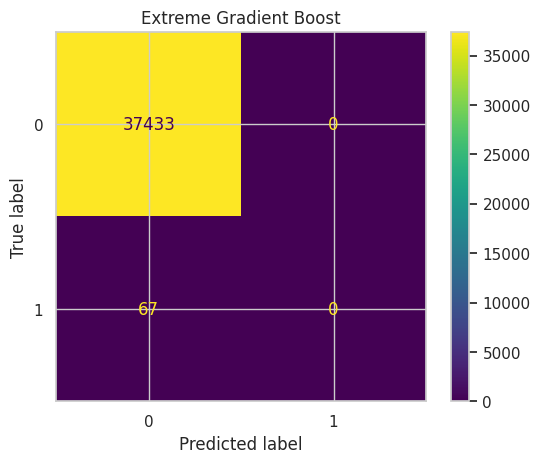

In [ ]:
# confusion matrix
preds = xgb_cv.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=xgb_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb_cv.classes_)
disp.plot(values_format='')
plt.title('Extreme Gradient Boost')
plt.show()

In [ ]:
# Concatenate all the validation scores dataframes.
result = pd.concat([ knc_cv_results, qda_cv_results, lda_cv_results,
                    tree_cv_results, rf_cv_results ,xgb_cv_results]).reset_index(drop=True)
result

,model,precision,recall,F1,accuracy,AUC
0,K-Neighbors Classifier cv,0.000000,0.000000,0.000000,0.998204,0.574497
1,Quadratic Discriminant Analysis cv,0.018233,0.346863,0.034639,0.964933,0.769974
2,Linear Discriminant Analysis cv,0.060515,0.183235,0.089345,0.993227,0.751605
3,Decision Tree cv,0.119949,0.019706,0.033660,0.997973,0.592201
4,Random Forest cv,0.000000,0.000000,0.000000,0.998204,0.725878
5,XGBoost cv,0.416667,0.014902,0.028483,0.998222,0.777692


In [ ]:
# Concatenate all the test scores dataframes.
test = pd.concat([  lr_results, gnb_results, svc_results,
                    knc_cv_scores, qda_cv_scores, lda_cv_scores,
                    tree_test_scores, rf_test_scores, xgb_test_scores]).reset_index(drop=True)
test

,model,precision,recall,F1,accuracy,AUC
0,Logistic Regression,0.333333,0.014925,0.028571,0.998187,0.507436
1,Gaussian Naive Bayes,0.021936,0.432836,0.041757,0.964507,0.699147
2,Support Vector Classifier,0.000000,0.000000,0.000000,0.998213,0.500000
3,K-Neighbors Classifier Test,0.000000,0.000000,0.000000,0.998213,0.500000
4,Quadratic Discriminant Analysis Test,0.022371,0.447761,0.042614,0.964053,0.706369
5,Linear Discriminant Analysis Test,0.047847,0.149254,0.072464,0.993173,0.571969
6,Decision Tree Test,0.062500,0.014925,0.024096,0.997840,0.507262
7,Random Forest Test,0.000000,0.000000,0.000000,0.998213,0.500000
8,XGBoost Test,0.000000,0.000000,0.000000,0.998213,0.500000


In [ ]:
# Champion model
test.sort_values('AUC', ascending=False).head(1)

,model,precision,recall,F1,accuracy,AUC
4,Quadratic Discriminant Analysis Test,0.022371,0.447761,0.042614,0.964053,0.706369


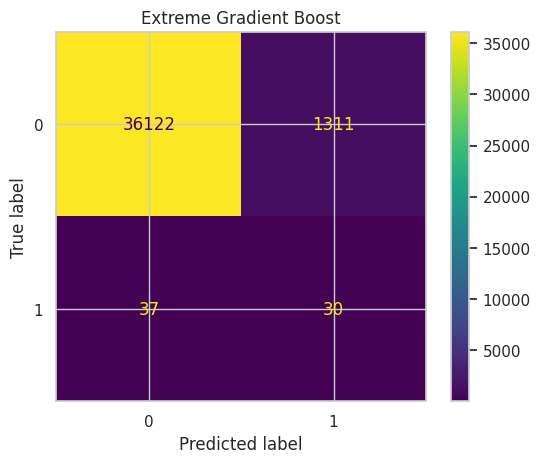

In [ ]:
# confusion matrix
preds = qda_cv.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=qda_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=qda_cv.classes_)
disp.plot(values_format='')
plt.title('Extreme Gradient Boost')
plt.show()

###**Machine learning models 'Hypertuned Parameters'**


**1) Logistic Regression (m1)**

In [ ]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)

# Get predicted classes for the test set
lr_predict = lr.predict(X_test)

# Calculate the ROC AUC score
lr_roc_auc_score = roc_auc_score(y_test, lr_predict)

lr_conf_matrix = confusion_matrix(y_test, lr_predict)
print("Confusion matrix")
print(lr_conf_matrix)
print("\n")

print("ROC AUC of Logistic Regression:", lr_roc_auc_score, '\n')
print(classification_report(y_test, lr_predict))

Confusion matrix
[[37431     2]
 [   66     1]]


ROC AUC of Logistic Regression: 0.507435972170776 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37433
           1       0.33      0.01      0.03        67

    accuracy                           1.00     37500
   macro avg       0.67      0.51      0.51     37500
weighted avg       1.00      1.00      1.00     37500



In [ ]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train, y_train)

# Get predicted classes for the test set
nbpred = nb.predict(X_test)

# Calculate the ROC AUC score
nb_roc_auc_score = roc_auc_score(y_test, nbpred)

nb_conf_matrix = confusion_matrix(y_test, nbpred)
print("Confusion matrix")
print(nb_conf_matrix)
print("\n")

print("ROC AUC of Naive Bayes model:", nb_roc_auc_score, '\n')
print(classification_report(y_test, nbpred))

Confusion matrix
[[36140  1293]
 [   38    29]]


ROC AUC of Naive Bayes model: 0.699147053182781 

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     37433
           1       0.02      0.43      0.04        67

    accuracy                           0.96     37500
   macro avg       0.51      0.70      0.51     37500
weighted avg       1.00      0.96      0.98     37500



**4) Support Vector Machine (m3)**


In [ ]:
m3 = 'Support Vector Classifier'
svc = SVC(probability=True)
svc.fit(X_train, y_train)

# Get predicted classes for the test set
svc_predicted = svc.predict(X_test)

# Calculate the ROC AUC score
svc_roc_auc_score = roc_auc_score(y_test, svc_predicted)

svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
print("Confusion matrix")
print(svc_conf_matrix)
print("\n")

print("ROC AUC of Support Vector Classifier:", svc_roc_auc_score, '\n')
print(classification_report(y_test, svc_predicted))

Confusion matrix
[[37433     0]
 [   67     0]]


ROC AUC of Support Vector Classifier: 0.5 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37433
           1       0.00      0.00      0.00        67

    accuracy                           1.00     37500
   macro avg       0.50      0.50      0.50     37500
weighted avg       1.00      1.00      1.00     37500



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**4) K-NeighborsClassifier (m4)**

In [ ]:
m4 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=29,weights='distance')
knn.fit(X_train, y_train)

# Get predicted classes for the test set
knn_predicted = knn.predict(X_test)

# Calculate the ROC AUC score
knn_roc_auc_score = roc_auc_score(y_test, knn_predicted)

knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
print("Confusion matrix")
print(knn_conf_matrix)
print("\n")

print("ROC AUC of K-NeighborsClassifier:", knn_roc_auc_score, '\n')
print(classification_report(y_test, knn_predicted))

Confusion matrix
[[37433     0]
 [   67     0]]


ROC AUC of K-NeighborsClassifier: 0.5 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37433
           1       0.00      0.00      0.00        67

    accuracy                           1.00     37500
   macro avg       0.50      0.50      0.50     37500
weighted avg       1.00      1.00      1.00     37500



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**5) Quadratic Discriminant Analysis (m5)**

In [ ]:
# Quadratic Discriminant Analysis
m5 = 'Quadratic Discriminant Analysis'
qda = QuadraticDiscriminantAnalysis(reg_param=0.2)
qda.fit(X_train, y_train)

# Get predicted classes for the test set
qda_predict = qda.predict(X_test)

# Calculate the ROC AUC score
qda_roc_auc_score = roc_auc_score(y_test, qda_predict)

qda_conf_matrix = confusion_matrix(y_test, qda_predict)
print("Confusion matrix")
print(qda_conf_matrix)
print("\n")

print("ROC AUC of Quadratic Discriminant Analysis:", qda_roc_auc_score, '\n')
print(classification_report(y_test, qda_predict))

Confusion matrix
[[36122  1311]
 [   37    30]]


ROC AUC of Quadratic Discriminant Analysis: 0.7063693101824512 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     37433
           1       0.02      0.45      0.04        67

    accuracy                           0.96     37500
   macro avg       0.51      0.71      0.51     37500
weighted avg       1.00      0.96      0.98     37500



**6) Linear Discriminant Analysis(m6)**

In [ ]:
# Linear Discriminant Analysis
m6 = 'Linear Discriminant Analysis'
lda = LinearDiscriminantAnalysis(solver = 'svd')
lda.fit(X_train, y_train)

# Get predicted classes for the test set
lda_predict = lda.predict(X_test)

# Calculate the ROC AUC score
lda_roc_auc_score = roc_auc_score(y_test, lda_predict)

lda_conf_matrix = confusion_matrix(y_test, lda_predict)
print("Confusion matrix")
print(lda_conf_matrix)
print("\n")

print("ROC AUC of Linear Discriminant Analysis:", lda_roc_auc_score, '\n')
print(classification_report(y_test, lda_predict))

Confusion matrix
[[37234   199]
 [   57    10]]


ROC AUC of Linear Discriminant Analysis: 0.5719687832310145 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     37433
           1       0.05      0.15      0.07        67

    accuracy                           0.99     37500
   macro avg       0.52      0.57      0.53     37500
weighted avg       1.00      0.99      0.99     37500



**7) DecisionTreeClassifier (m7)**

In [ ]:
m7 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(random_state=42, max_depth = 10, min_samples_leaf = 4, min_samples_split = 10)
dt.fit(X_train, y_train)

# Get predicted classes for the test set
dt_predicted = dt.predict(X_test)

# Calculate the ROC AUC score
dt_roc_auc_score = roc_auc_score(y_test, dt_predicted)

dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
print("Confusion matrix")
print(dt_conf_matrix)
print("\n")

print("ROC AUC of DecisionTreeClassifier:", dt_roc_auc_score, '\n')
print(classification_report(y_test, dt_predicted))

Confusion matrix
[[37418    15]
 [   66     1]]


ROC AUC of DecisionTreeClassifier: 0.5072623285942526 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37433
           1       0.06      0.01      0.02        67

    accuracy                           1.00     37500
   macro avg       0.53      0.51      0.51     37500
weighted avg       1.00      1.00      1.00     37500



**8) Random Forest Classifier (m8)**

In [ ]:
m8 = 'Random Forest Classifier'
rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=8, min_samples_leaf= 10)
rf.fit(X_train, y_train)

# Get predicted classes for the test set
rf_predicted = rf.predict(X_test)

# Calculate the ROC AUC score
rf_roc_auc_score = roc_auc_score(y_test, rf_predicted)

rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
print("Confusion matrix")
print(rf_conf_matrix)
print("\n")

print("ROC AUC of Random Forest:", rf_roc_auc_score, '\n')
print(classification_report(y_test, rf_predicted))

Confusion matrix
[[37433     0]
 [   67     0]]


ROC AUC of Random Forest: 0.5 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37433
           1       0.00      0.00      0.00        67

    accuracy                           1.00     37500
   macro avg       0.50      0.50      0.50     37500
weighted avg       1.00      1.00      1.00     37500



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**9) Extreme Gradient Boost (m9)**

In [ ]:
m9 = 'Extreme Gradient Boost'
xgb = XGBClassifier(random_state=42, learning_rate = 0.026, max_depth=4, n_estimators=322,
                               subsample=0.50, min_child_weight= 2,
                               gamma=0.15,colsample_bytree =0.95)
xgb.fit(X_train, y_train)

# Get predicted classes for the test set
xgb_predicted = xgb.predict(X_test)

# Calculate the ROC AUC score
xgb_roc_auc_score = roc_auc_score(y_test, xgb_predicted)

xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
print("Confusion matrix")
print(xgb_conf_matrix)
print("\n")

print("ROC AUC of Extreme Gradient Boost:", xgb_roc_auc_score, '\n')
print(classification_report(y_test, xgb_predicted))

Confusion matrix
[[37433     0]
 [   67     0]]


ROC AUC of Extreme Gradient Boost: 0.5 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37433
           1       0.00      0.00      0.00        67

    accuracy                           1.00     37500
   macro avg       0.50      0.50      0.50     37500
weighted avg       1.00      1.00      1.00     37500



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**All Models Performance**

In [ ]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Gaussian Naive Bayes',
                                   'Support Vector Machine','K-Nearest Neighbour',
                                   'Quadratic Discriminant Analysis', 'Linear Discriminant Analysis',
                                   'Decision Tree','Random Forest','XGBoost Test'],
                    'AUC': [lr_roc_auc_score, nb_roc_auc_score,
                            svc_roc_auc_score, knn_roc_auc_score,
                            qda_roc_auc_score, lda_roc_auc_score,
                            dt_roc_auc_score, rf_roc_auc_score, xgb_roc_auc_score]})


In [ ]:
model_ev.sort_values('AUC', ascending=False)

,Model,AUC
4,Quadratic Discriminant Analysis,0.706369
1,Gaussian Naive Bayes,0.699147
5,Linear Discriminant Analysis,0.571969
0,Logistic Regression,0.507436
6,Decision Tree,0.507262
2,Support Vector Machine,0.500000
3,K-Nearest Neighbour,0.500000
7,Random Forest,0.500000
8,XGBoost Test,0.500000


Reciever Operating Characterstic Curve**

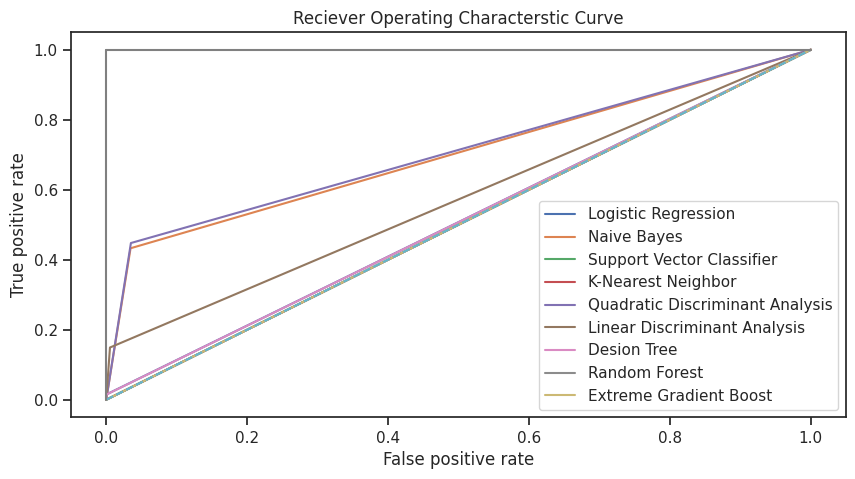

In [ ]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)
qda_false_positive_rate, qda_true_positive_rate, qda_threshold = roc_curve(y_test, qda_predict)
lda_false_positive_rate, lda_true_positive_rate, lda_threshold = roc_curve(y_test, lda_predict)


sns.set_style('ticks')
plt.figure(figsize=(10,5))
plt.title('Reciever Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(qda_false_positive_rate, qda_true_positive_rate, label='Quadratic Discriminant Analysis')
plt.plot(lda_false_positive_rate, lda_true_positive_rate, label='Linear Discriminant Analysis')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [ ]:
#test models
test

,model,precision,recall,F1,accuracy,AUC
0,Logistic Regression,0.333333,0.014925,0.028571,0.998187,0.507436
1,Gaussian Naive Bayes,0.021936,0.432836,0.041757,0.964507,0.699147
2,Support Vector Classifier,0.000000,0.000000,0.000000,0.998213,0.500000
3,K-Neighbors Classifier Test,0.000000,0.000000,0.000000,0.998213,0.500000
4,Quadratic Discriminant Analysis Test,0.022371,0.447761,0.042614,0.964053,0.706369
5,Linear Discriminant Analysis Test,0.047847,0.149254,0.072464,0.993173,0.571969
6,Decision Tree Test,0.062500,0.014925,0.024096,0.997840,0.507262
7,Random Forest Test,0.000000,0.000000,0.000000,0.998213,0.500000
8,XGBoost Test,0.000000,0.000000,0.000000,0.998213,0.500000


# Conclusion

After experimenting with different classification models, we found that the Quadratic Discriminant Analysis (QDA) model consistently outperformed other models in terms of AUC score on the test set.

Imagine our fraud detection system as a highly trained guard dog. We've shown this dog thousands of examples of good and bad credit card transactions, teaching it to sniff out the suspicious ones. This "dog" is actually the QDA model.